In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
plt.style.use("fivethirtyeight")

In [2]:
from PIL import Image

An image of the Cheshire Cat and Alice from the book Alice in Wonderland by Lewis Carroll.

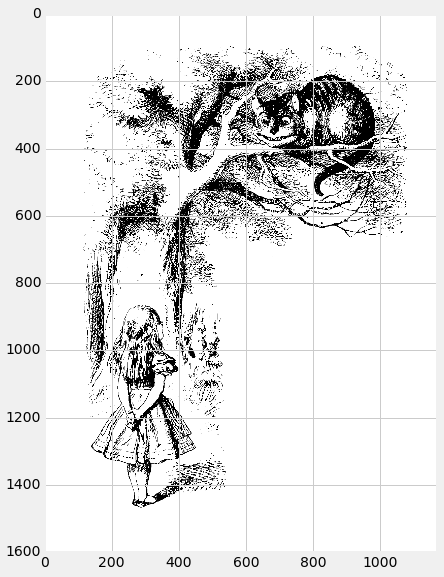

In [5]:
img = Image.open('p5_image.gif')
plt.figure(figsize=(9, 9))
plt.imshow(img);

Convert the image into a Numpy matrix format and then plot the image again to show it is the same.

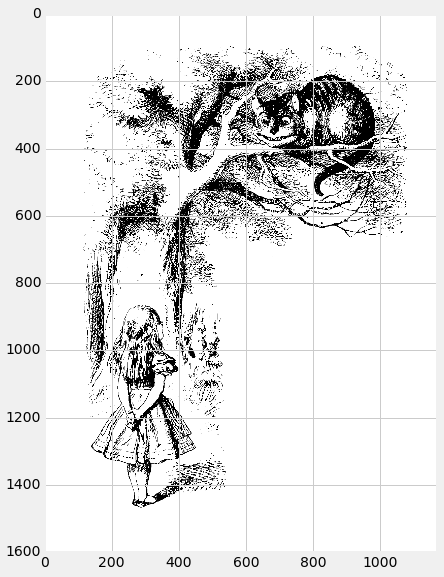

In [7]:
imgmat = np.array(list(img.getdata(band=0)), float)
imgmat.shape = (img.size[1], img.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9, 9))
plt.imshow(imgmat, cmap='gray');

The image is represented as a 1600 X 1170 matrix.

In [8]:
imgmat.shape

(1600L, 1170L)

In [9]:
U, sigma, V = np.linalg.svd(imgmat) #decompose image matrix with SVD

In [15]:
ks = [1, 3, 10, 20, 50, 100, 150, 200, 400, 800] #Different rank values to use for approximation

Use the singular value decomposition of the image matrix from above to recover the rank k approximation of the image.

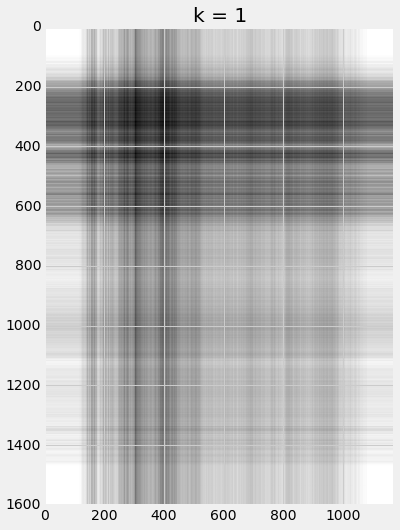

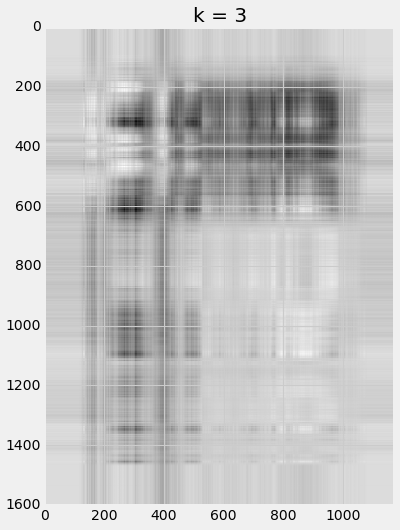

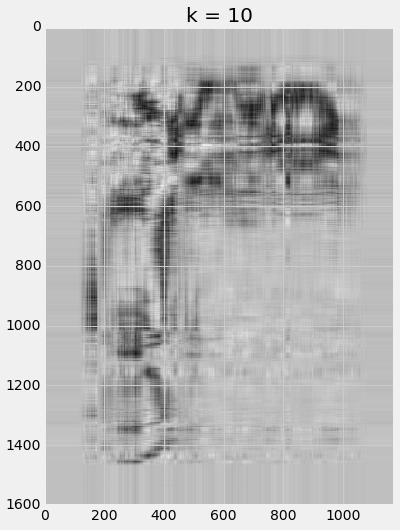

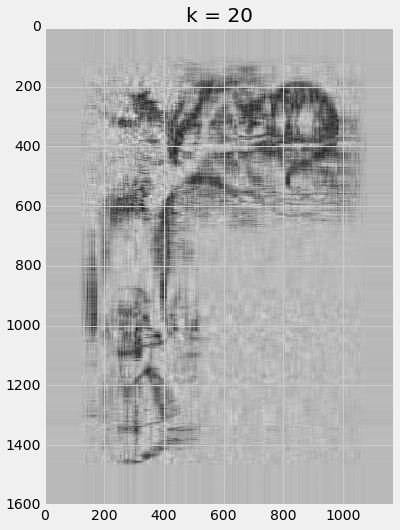

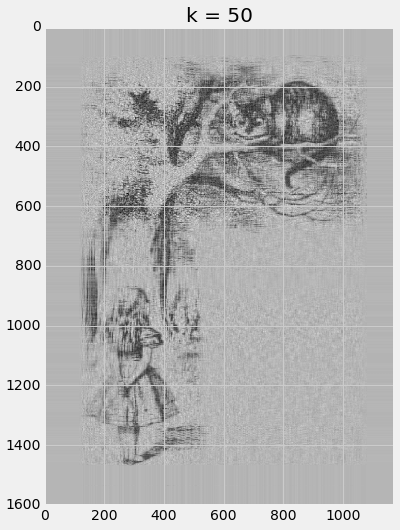

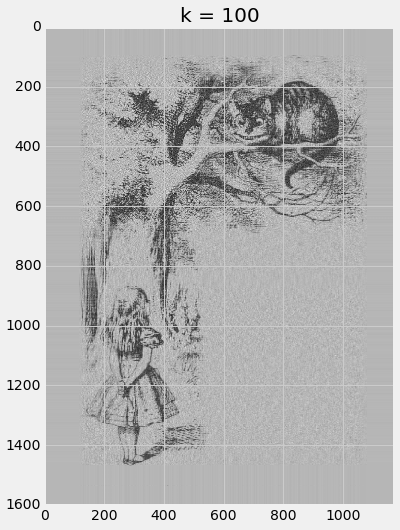

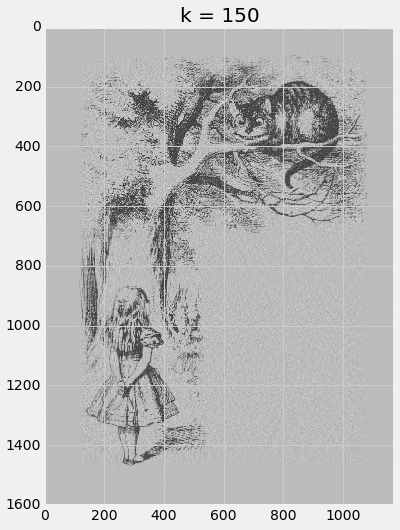

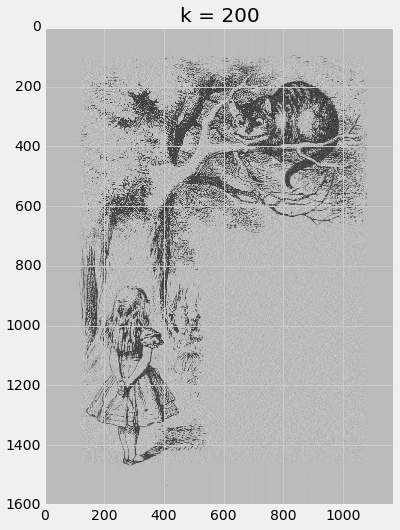

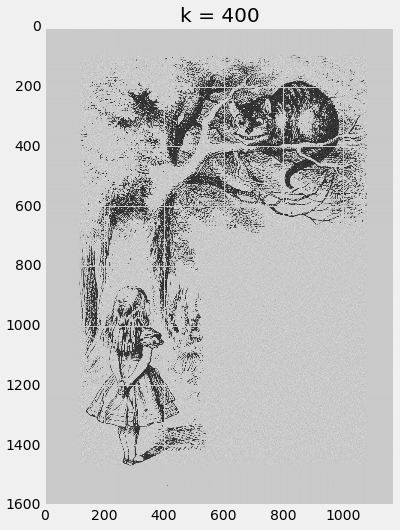

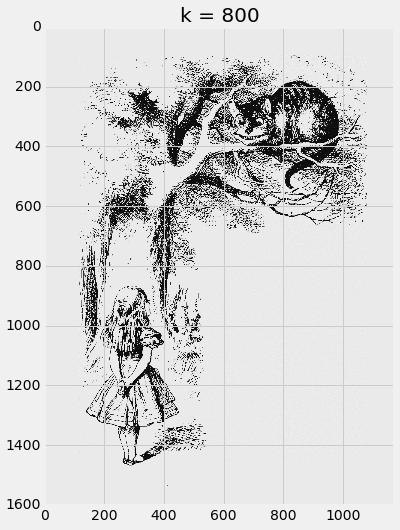

In [17]:
for k in ks:
    recover_img = np.matrix(U[:, :k]) * np.diag(sigma[:k]) * np.matrix(V[:k, :])
    title = "k = %d" % k
    plt.figure(figsize=(8, 8))
    plt.imshow(recover_img, cmap = "gray");
    plt.title(title)
    plt.show()

The image starts to become recognizible even at k = 20 and becomes gradually more similar to the original image as the rank k increases. By the time k = 800, the recovered rank 800 approximation is very similar to the original image.

In [2]:
data = pd.read_csv("co_occur.csv", header=None)

In [110]:
data.shape

(10000, 10000)

In [129]:
coMat = data.iloc[:10000, :10000].values
coMat = np.log(coMat + 1)
coMat.shape

(10000L, 10000L)

In [130]:
U, sigma, V = np.linalg.svd(coMat) 

In [131]:
sumSV = sum(sigma)
cumVals = [sum(sigma[:k])/sumSV for k in range(1, len(sigma) + 1)]

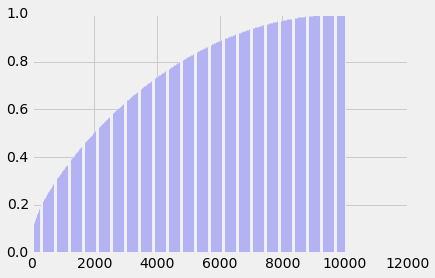

In [132]:
plt.bar(range(1, len(sigma)+1), cumVals);

In [133]:
wordDict = np.loadtxt("dictionary.txt", delimiter=" ", dtype="string")
len(wordDict)

10000

In [124]:
def wordMatch(word):
    word_index = np.where(wordDict == word)[0][0]
    word_vect = U[:, word_index]
    print "Least matching:", wordDict[np.argsort(word_vect)[:10]]
    print "Most matching:", wordDict[np.argsort(-word_vect)[:10]]

In [134]:
wordMatch("boy")

Least matching: ['wet' 'baby' 'metres' 'squadron' 'mobile' 'association' 'ferry' 'welsh'
 'cash' 'aid']
Most matching: ['industrial' 'unit' 'ball' 'review' 'stone' 'best' 'shadow' 'deck' 'asia'
 'dos']


Normalize U so that each row has unit L2 norm. This ith row of U after normalization will be regarded as the embedding of the ith word. Let v1 be the embedding for "woman" and v2 be the embedding for "man". Let v = v1 - v2.

In [81]:
from sklearn.preprocessing import normalize

In [136]:
Unorm = normalize(U, norm="l2", axis=1)

In [137]:
woman_index = np.where(wordDict == "woman")[0][0]
man_index = np.where(wordDict == "man")[0][0]
v1 = Unorm[woman_index, :] #word embedding for woman
v2 = Unorm[man_index, :]  #word embedding for man
v = v1 - v2